# EDA

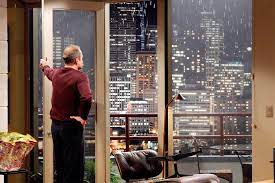

In [30]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Understanding the data
### These are the two tables resulting from fetching the data (eda_sales, eda_details)

In [31]:
df_sales = pd.read_csv('eda_sales.csv')
df_sales.describe()

,price,house_id,id
count,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000
std,367368.140,2876735715.748,6234.661
min,78000.000,1000102.000,1.000
25%,322000.000,2123049175.000,5400.000
50%,450000.000,3904930410.000,10799.000
75%,645000.000,7308900490.000,16198.000
max,7700000.000,9900000190.000,21597.000


In [32]:
df_details = pd.read_csv('eda_details.csv')
df_details.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,19060.000,21357.000,21420.000,21420.000,21420.000,20969.000,21420.000,17609.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,4580939869.158,3.374,2.118,2083.133,15128.038,1.496,0.008,0.235,3.411,7.663,1791.170,292.087,1971.093,838.806,98077.874,47.560,-122.214,1988.384,12775.718
std,2876761172.448,0.925,0.769,918.808,41530.797,0.540,0.087,0.766,0.650,1.172,828.693,442.696,29.387,4005.127,53.477,0.139,0.141,685.537,27345.622
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123537386.750,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1200.000,0.000,1952.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904921185.000,3.000,2.250,1920.000,7614.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900186.250,4.000,2.500,2550.000,10690.500,2.000,0.000,0.000,4.000,8.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.125,2370.000,10086.250
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


### In DBeaver, I joined both tables using house_id to create one single table

In [33]:
df = pd.read_csv("king_county_joined.csv") #joined table from house_id
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,221900.000,2014-10-13
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,538000.000,2014-12-09
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,180000.000,2015-02-25
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,604000.000,2014-12-09
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,510000.000,2015-02-18


### I start exploring unique values, missing values and basic statistics

In [34]:
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['bedrooms'].unique())
print(df['condition'].unique())
print(df['grade'].unique())
print(df['zipcode'].unique())
print(df['yr_renovated'].unique())

print(df['zipcode'].value_counts()) #how many houses per zipcode?
df['waterfront'].value_counts() #how many houses with waterfronts?

[nan  0.  1.]
[ 0. nan  3.  4.  2.  1.]
[ 3.  2.  4.  5.  1.  6.  7.  8.  9. 11. 10. 33.]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13]
[98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]
[    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19

waterfront
0.000    19060
1.000      146
Name: count, dtype: int64

In [35]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
date                0
dtype: int64

In [36]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


**Preliminary observations**

- Median price: $450,000 → That is likely what our client's “limited budget” should aim for.

- 75% percentile: $645,000 and Max price: $7,700,000 → The difference between them shows that there are clear price outliers that should be removed.

- Waterfront percentage = 0.8 → less than 1% of houses are waterfront, VERY rare.

- There are 70 zipcodes → many neighbourhoods!

- There are some missing values in "waterfront", "view", "sqft_basement" and "yr_renovated" that should be taken care of.

- Also, the "yr_renovated" values seem to have an extra zero at the end! Needs correction.

# 2. Cleaning the data

**Fixing incorrect years in "yr_renovated"**

In [37]:
df[df['yr_renovated'] > 2025]['yr_renovated'].unique()
df.loc[df['yr_renovated'] > 2025, 'yr_renovated'] = df.loc[df['yr_renovated'] > 2025, 'yr_renovated'] / 10
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

**Filling missing values of "waterfront", "view", "yr_renovated" to zero (because we can safely assume they are zero).** 
However I am not going to fill the missing values of "sqft_basement" with zero because that doesn't seem a safe assumption. Since I'm not going to need these values for my client, I'm not going to bother :)

In [38]:
df['waterfront']    = df['waterfront'].fillna(0) #missing waterfront probably means it doesn't have a waterfront
df['view']          = df['view'].fillna(0) #missing view probably means it doesn't have a good view
df['yr_renovated']  = df['yr_renovated'].fillna(0) #missing = “never renovated”, so I also set it to zero
#df['sqft_basement'] = df['sqft_basement'].fillna(0)

**Converting some columns from float numbers into integers because it's going to be easier to work with**

In [ ]:
int_cols = [
    'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
    'zipcode', 'sqft_living15', 'sqft_lot15', 'price', 'yr_renovated'
]

for col in int_cols:
    df[col] = df[col].fillna(0).astype(int)


print(df['price'].head()) 
print(df['sqft_lot15'].head()) #I check it's been done correctly for a couple of columns at least

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64
0    5650
1    7639
2    8062
3    5000
4    7503
Name: sqft_lot15, dtype: int64


**Removing the outliers:** first I plot the price distribution, and then I remove the outliers

Text(0, 0.5, 'Number of houses')

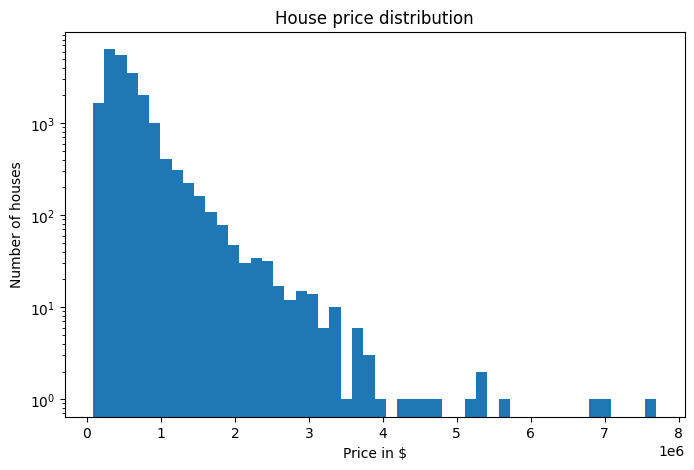

In [40]:
df['price'].plot(kind='hist', bins=50, log=True)
plt.title("House price distribution")
plt.xlabel("Price in $")
plt.ylabel("Number of houses")

In [41]:
df_no_out = df[df['price'] <= 4000000] #everything above $4M can be safely removed


Text(0, 0.5, 'Number of houses')

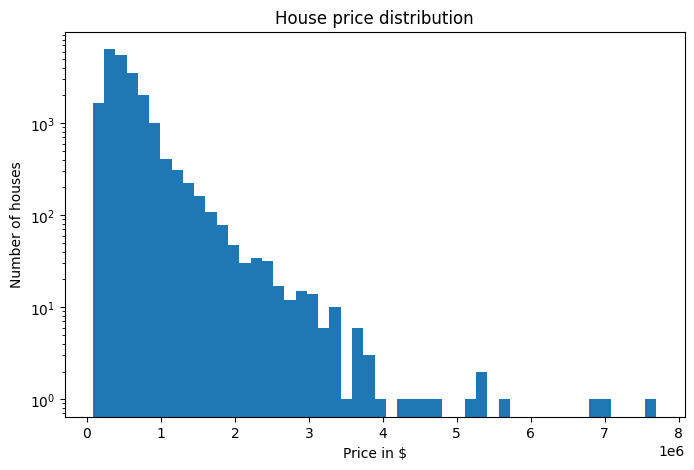

In [42]:
df['price'].plot(kind='hist', bins=50, log=True)
plt.title("House price distribution")
plt.xlabel("Price in $")
plt.ylabel("Number of houses")

Let's also check the price distribution per number of bedrooms (our client doesn't need more than 2/3 bedrooms so we don't think this variable it's going to be decisive).

<Axes: title={'center': 'price'}, xlabel='bedrooms'>

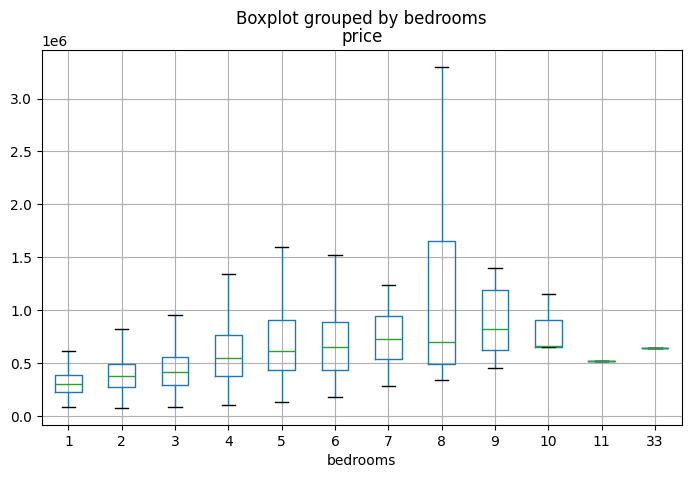

In [65]:
df_no_out.boxplot(column='price', by='bedrooms', showfliers=False)

As expected, all houses with 1, 2, 3 bedrooms fall within a reasonable price range so it's not going to play a decisive variable in our case.

# 3. Hypothesis and Insights

## Hypothesis 1: The Waterfront Premium
We believe waterfront properties command a significant price premium, placing them in a "luxury" category that is likely outside our persona's budget.



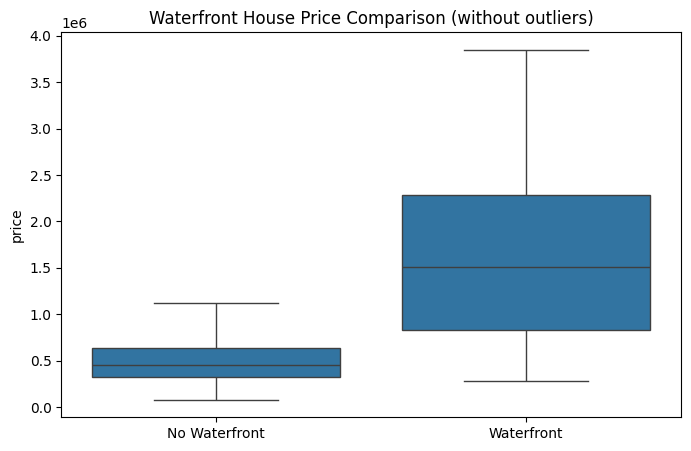

waterfront
0    450000.000
1   1510000.000
Name: price, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="waterfront", y="price",showfliers=False)
plt.xlabel("")
plt.xticks([0,1], ["No Waterfront", "Waterfront"])
plt.title("Waterfront House Price Comparison")
plt.show()

df.groupby("waterfront")["price"].median()

- Mean price without waterfront: 450.000$
- Mean prince with waterfront: 1.510.000$
- Waterfront houses are about 2.36 times more expensive than non-waterfront houses.

The plot shows waterfront properties are more expensive.
Our first hypotheses is confirmed : **Waterfront properties command a significant price premium, placing them in a “luxury” category that is likely outside our persona’s budget.**


## Hypothesis 2: The Value of Seclusion & Centrality
We believe certain ZIP codes offer a unique combination of seclusion (larger lots, lower density) and centrality, and that these properties carry a distinct high price.



### Visual map of the houses 

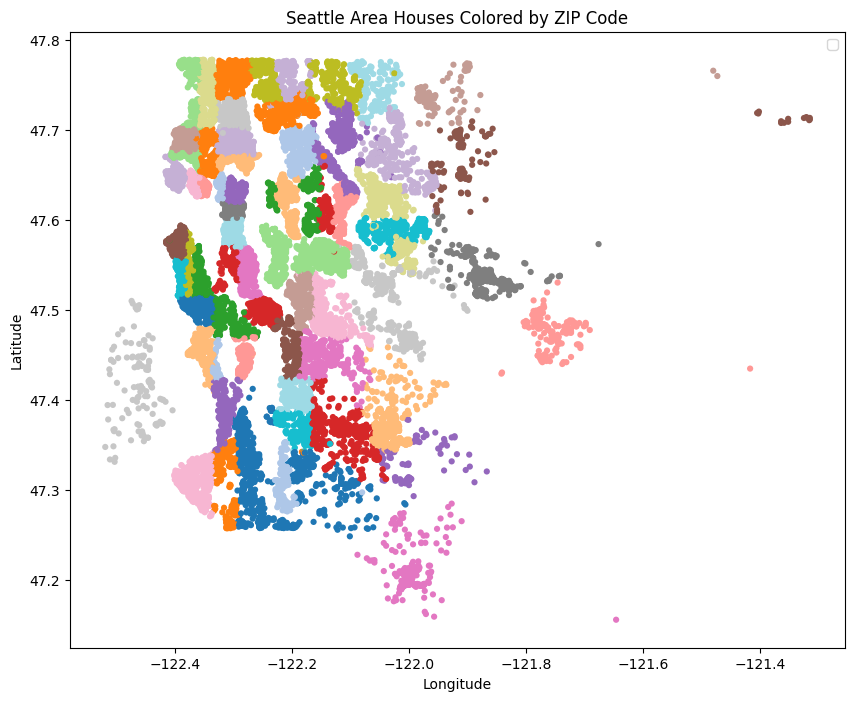

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='long',
    y='lat',
    hue='zipcode',
    palette='tab20',   # good for many categories
    s=20,
    linewidth=0
)

plt.title("Seattle Area Houses Colored by ZIP Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.legend(title='ZIP Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend("") #I removed the legend because it was very long and occupied much space, but it can be added by un-commenting the previous line
plt.show()

This scattering plot shows us the distribution of houses per ZIP code, and gives us a nice map of Seattle's neighborhoods.

To check our hypothesis we want to know whether secluded areas that are also central carry a significant higher price. For that, let's:

- find out the mean price of the top 10 most isolated neighborhoods (using "sqft_lot15" and "price").
- map them in a scattering plot.
- check whether the most central are also the most expensive.


In [54]:
zip_isolation = df.groupby("zipcode")["sqft_lot15"].median().sort_values(ascending=False)
print(zip_isolation.head(10)) #top 10 most isolated neighbourhoods


zipcode
98024   44197.500
98070   40510.000
98077   37038.000
98014   21881.000
98010   18963.000
98039   16582.500
98072   15000.000
98040   11664.500
98005   11623.500
98045   11560.000
Name: sqft_lot15, dtype: float64


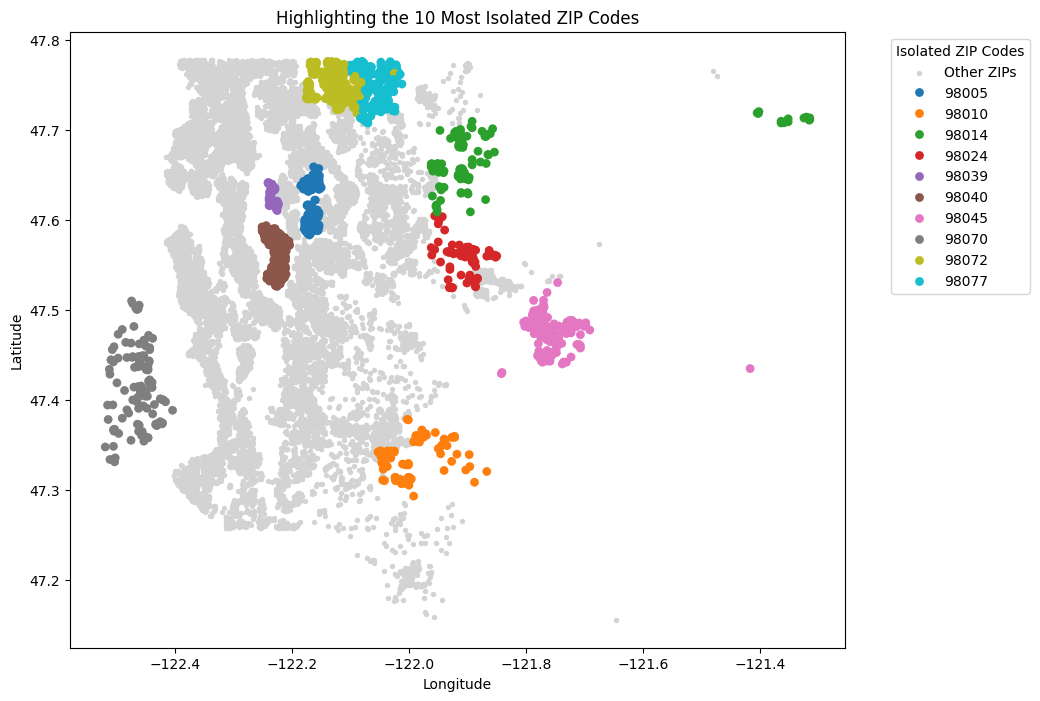

In [55]:

# List of isolated ZIP codes
isolated_zips = [
    98024, 98070, 98077, 98014, 98010,
    98039, 98072, 98040, 98005, 98045
]

# Split data
df_isolated = df_no_out[df_no_out['zipcode'].isin(isolated_zips)]
df_other = df_no_out[~df_no_out['zipcode'].isin(isolated_zips)]

plt.figure(figsize=(10, 8))

# Plot all non-isolated houses in grey
sns.scatterplot(
    data=df_other,
    x='long',
    y='lat',
    color='lightgrey',
    s=15,
    linewidth=0,
    label='Other ZIPs'
)

# Plot isolated ZIPs, each with a different color
sns.scatterplot(
    data=df_isolated,
    x='long',
    y='lat',
    hue='zipcode',
    palette='tab10',
    s=40,
    linewidth=0
)

plt.title("Highlighting the 10 Most Isolated ZIP Codes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend(title='Isolated ZIP Codes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


From this map we see that the most central areas that are also isolated are the ZIP codes in brown (98040), in dark purple (98039) and in dark blue (98005). Are these the most expensive?

In [62]:
zip_price = df_no_out.groupby("zipcode")["price"].median() #median price per zipcode
zip_compare = pd.DataFrame({
    "median_price": zip_price,
    "median_isolation": zip_isolation
}).dropna()

zip_top_isolated = zip_compare.sort_values("median_isolation", ascending=False).head(10) #median price for the top 10 isolated areas
print(zip_top_isolated.sort_values("median_price", ascending=False))

         median_price  median_isolation
zipcode                                
98039     1880000.000         16582.500
98040      992750.000         11664.500
98005      765475.000         11623.500
98077      652475.000         37038.000
98072      515000.000         15000.000
98070      465000.000         40510.000
98024      462500.000         44197.500
98014      415000.000         21881.000
98045      404750.000         11560.000
98010      359999.500         18963.000


From this table we can see that the most expensive of the top 10 areas are the ones with ZIP codes 98039, 98040, 98005, which are precisely the 3 most central neighborhoods that we identified above!

Our second hypothesis is confirmed: **ZIP codes that offer a unique combination of seclusion (larger lots, lower density) and centrality, also carry a distinct high price.**

## Hypothesis 3: The Waterfront vs. Isolation Trade-Off
We believe 'waterfront view' and 'neighborhood isolation' are mutually exclusive features. Does a buyer have to prioritize one desirable trait over the other?

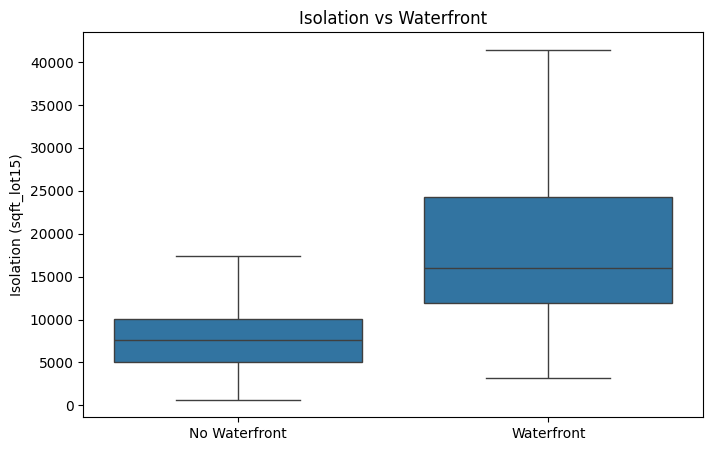

In [63]:
sns.boxplot(data=df_no_out, x="waterfront", y="sqft_lot15",showfliers=False)
plt.xticks([0,1], ["No Waterfront", "Waterfront"])
plt.xlabel("")
plt.ylabel("Isolation (sqft_lot15)")
#plt.ylim(-1e3,871200)
plt.title("Isolation vs Waterfront")
plt.show()

Our plot suggests that waterfront houses are also more isolated in general.

Contrary to our hypothesis, **"waterfront view" and "neighborhood isolation" are not mutually exclusive!**

# 4. Exploring the data further + client recommendations

Let's now explore the date further by having our clients wishes and constraints in mind: 

*Waterfront, limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't want his kids to play with other kids... because of germs)*

Let's create variables for (most of) these criteria:

- Waterfront : yes,
- Limited budget : around median (450.000$) so < 500.000$ (lower maximum), or < 645.000$ (higher maximum, 75% percentile)
- Nice neighborhood : this is difficult to define with a variable and will be assessed by other means,
- Isolated : sqft_lot15 scores high ("no kids around" will be subsumed under this variable),
- Central : close to (<10km) city center (47.61 latitude, -122.33 longitude),
- Bedrooms : > 2 for when his kids stay over.

Let's try to apply them all in their most restrictive sense and see what we come up with.



Creating a "centrality" variable:

In [66]:

# Seattle city center coordinates
center_lat = 47.61
center_lon = -122.33

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# Create the centrality column in km
df_no_out["centrality_km"] = haversine(
    df_no_out["lat"], df_no_out["long"],
    center_lat, center_lon
)


Creating an isolation threshold (top most isolated houses):

In [ ]:
# Isolation threshold = top 25% most isolated
iso_threshold_25 = df_no_out["sqft_lot15"].quantile(0.75)


Applying filters (strictest version):

In [112]:

df_client_strict = df_no_out[
    (df_no_out["waterfront"] == 1) &
    (df_no_out["price"] < 500000) &
    (df_no_out["centrality_km"] < 10) &
    (df_no_out["sqft_lot15"] >= iso_threshold_25) &
    (df_no_out["bedrooms"] > 1)
].copy()

df_client_strict.shape

(0, 22)

The result is (expectedly) ZERO houses! So we need to relax the filters... 

We will need to relax these filters independently and see what other houses pop up.

### Option A. Relaxing the centrality

In [91]:
df_client_A = df_no_out[
    (df_no_out["waterfront"] == 1) &
    (df_no_out["price"] < 500000) &
    (df_no_out["centrality_km"] < 20) &
    (df_no_out["sqft_lot15"] >= iso_threshold_25) &
    (df_no_out["bedrooms"] > 1)
].copy()

df_client_A.shape

(3, 22)

The result is THREE houses... Let's plot them!

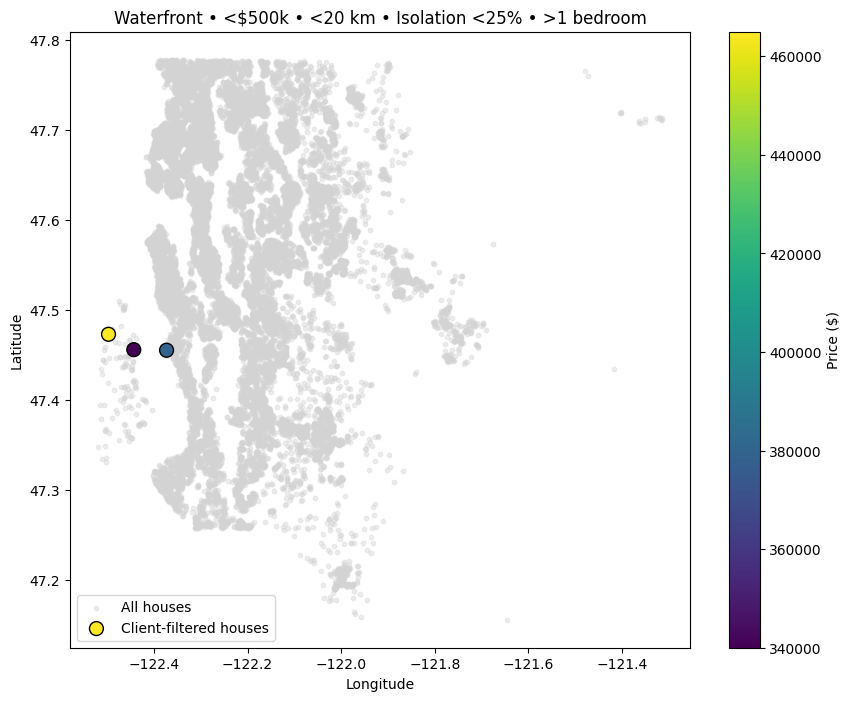

In [114]:
plt.figure(figsize=(10,8))

# All houses (background)
plt.scatter(
    df_no_out["long"], df_no_out["lat"],
    s=10, color="lightgrey", alpha=0.4, label="All houses"
)

# Selected houses (foreground)
scatter = plt.scatter(
    df_client_A["long"], df_client_A["lat"],
    s=100, c=df_client_A["price"],
    cmap="viridis", edgecolor="black",
    label="Client-filtered houses"
)

plt.colorbar(scatter, label="Price ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Waterfront • <$500k • <20 km • Isolation <25% • >1 bedroom")
plt.legend()
plt.show()


The yellow and purple houses are in the Island of Vashon, a calm and green oasis with big plots and affordable houses. It is connected to Seattle's central area through a ferry in the north of the island so our client could be in Seattle Downtown in 45min to an hour!

The blue house is in the beachy area of Burien, a 30 min car ride to Seattle's Downtown or 50 minutes by public transport. It is perfect if our client prioritizes isolation and affordability, but its closeness to the Seattle-Tacoma Airport might not make it the nicest location...

In [95]:
summary_A = df_client_A[[
    "id", "price", "zipcode", "sqft_lot15", "centrality_km", "bedrooms", "waterfront"
]].copy()

summary_A.rename(columns={
    "sqft_lot15": "isolation"
}, inplace=True)

summary_A


,id,price,zipcode,isolation,centrality_km,bedrooms,waterfront
14813,2423029009,465000,98070,43583,19.745,2,1
16556,2923039243,340000,98070,47462,19.140,4,1
18833,7631800110,380000,98166,17313,17.524,3,1


### Option B. Relaxing the budget

In [100]:
df_client_B = df_no_out[
    (df_no_out["waterfront"] == 1) &
    (df_no_out["price"] < 700000) &
    (df_no_out["centrality_km"] < 20) &
    (df_no_out["sqft_lot15"] >= iso_threshold_25) &
    (df_no_out["bedrooms"] > 1)
].copy()

df_client_B.shape

(7, 22)

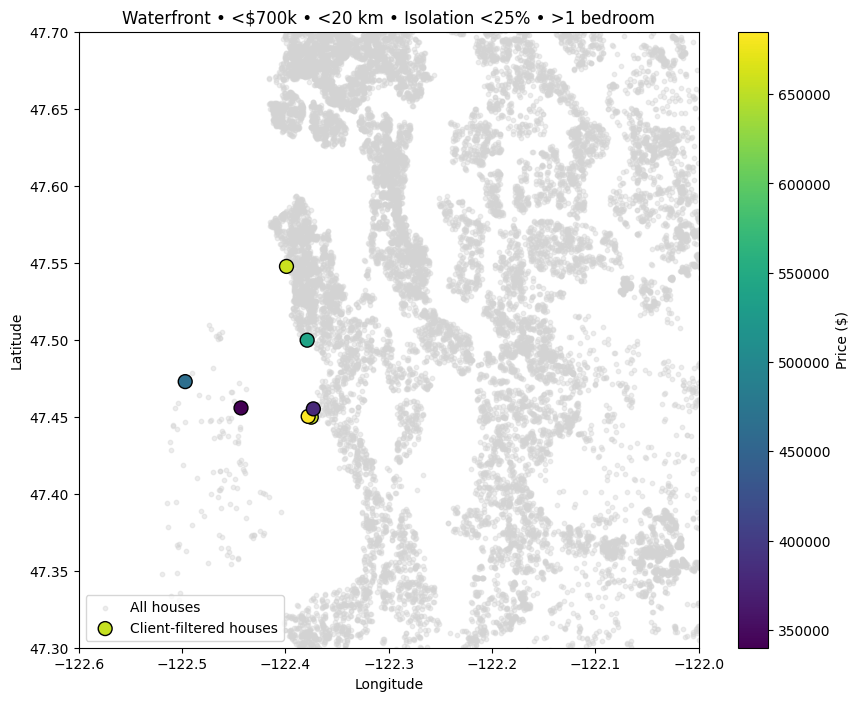

In [118]:
plt.figure(figsize=(10,8))

# All houses (background)
plt.scatter(
    df_no_out["long"], df_no_out["lat"],
    s=10, color="lightgrey", alpha=0.4, label="All houses"
)

# Selected houses (foreground)
scatter = plt.scatter(
    df_client_B["long"], df_client_B["lat"],
    s=100, c=df_client_B["price"],
    cmap="viridis", edgecolor="black",
    label="Client-filtered houses"
)

plt.colorbar(scatter, label="Price ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Waterfront • <$700k • <20 km • Isolation <25% • >1 bedroom")
plt.legend()

# ZOOMED-IN BOUNDARIES
plt.xlim(-122.6, -122.0)
plt.ylim(47.3, 47.7)

plt.show()


In [102]:
summary_B = df_client_B[[
    "id", "price", "zipcode", "sqft_lot15", "centrality_km", "bedrooms", "waterfront"
]].copy()

summary_B.rename(columns={
    "sqft_lot15": "isolation"
}, inplace=True)

summary_B

,id,price,zipcode,isolation,centrality_km,bedrooms,waterfront
230,8096000060,655000,98166,13193,18.142,2,1
13225,2623039018,685000,98166,22047,18.131,4,1
14813,2423029009,465000,98070,43583,19.745,2,1
15357,7936500221,658000,98136,15792,8.656,2,1
16556,2923039243,340000,98070,47462,19.140,4,1
17460,6329000185,540000,98146,14700,12.804,3,1
18833,7631800110,380000,98166,17313,17.524,3,1


Increasing the budget gives us a few more options!

We now have a couple more houses in the areas of White Center (98146) and Gatewood/Seaview (98136), with their many parks and beaches. These are only a 40 minute ride to the center by bus, or only 15 min by car!

### Option C. Relaxing the waterfront... 

In [105]:
df_client_C = df_no_out[
    (df_no_out["waterfront"] == 0) &
    (df_no_out["price"] < 500000) &
    (df_no_out["centrality_km"] < 10) &
    (df_no_out["sqft_lot15"] >= iso_threshold_25) &
    (df_no_out["bedrooms"] > 1)
].copy()

df_client_C.shape

(8, 22)

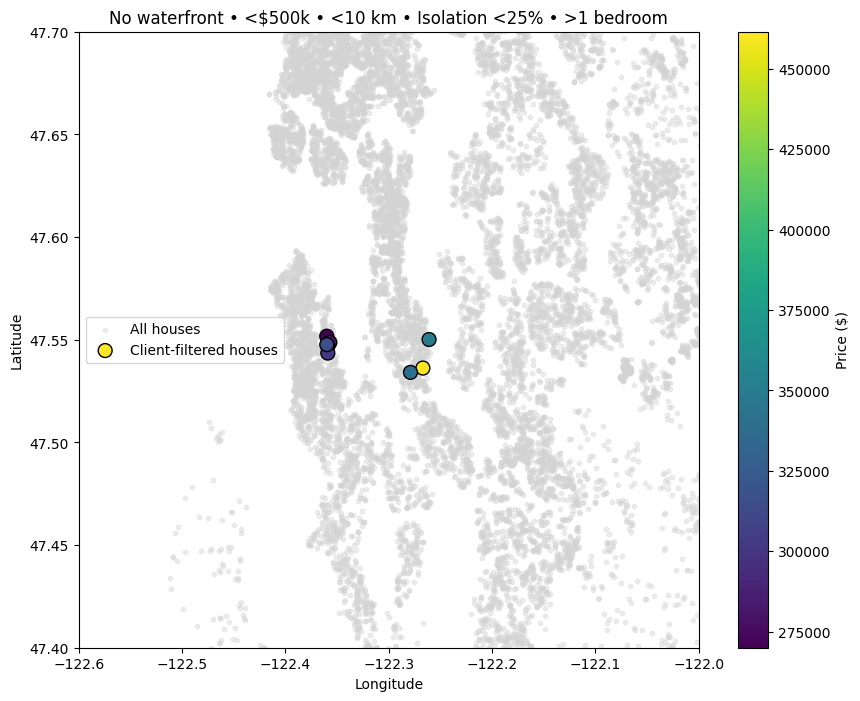

In [121]:
plt.figure(figsize=(10,8))

# All houses (background)
plt.scatter(
    df_no_out["long"], df_no_out["lat"],
    s=10, color="lightgrey", alpha=0.4, label="All houses"
)

# Selected houses (foreground)
scatter = plt.scatter(
    df_client_C["long"], df_client_C["lat"],
    s=100, c=df_client_C["price"],
    cmap="viridis", edgecolor="black",
    label="Client-filtered houses"
)

plt.colorbar(scatter, label="Price ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("No waterfront • <$500k • <10 km • Isolation <25% • >1 bedroom")
plt.legend()

# ZOOMED-IN BOUNDARIES
plt.xlim(-122.6, -122.0)
plt.ylim(47.4, 47.7)

plt.show()

In [110]:
summary_C = df_client_C[[
    "id", "price", "zipcode", "sqft_lot15", "centrality_km", "bedrooms", "waterfront"
]].copy()

summary_C.rename(columns={
    "sqft_lot15": "isolation"
}, inplace=True)

summary_C

,id,price,zipcode,isolation,centrality_km,bedrooms,waterfront
5062,2624049167,461550,98118,11072,9.470,3,0
6816,3438500430,270000,98106,10839,6.862,3,0
6825,8835900086,350000,98118,11100,8.435,4,0
8603,3904100065,340000,98118,15884,9.266,2,0
13248,3438500981,280000,98106,12700,7.111,2,0
16599,3438501100,400000,98106,17707,7.367,3,0
16887,3438501700,300000,98106,17340,7.708,3,0
18383,3438501081,315000,98106,11666,7.294,3,0
